In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

directory = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/first_week/forwards/ArielInstrumentTier2"
subfolders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]

print(subfolders)




['Planet2134_Oxidized', 'Planet75819_Oxidized', 'Planet63866_Oxidized', 'Planet21618_Reduced', 'Planet91921_Reduced', 'Planet6769_Reduced', 'Planet66254_Reduced', 'Planet26924_Oxidized', 'Planet85799_Reduced', 'Planet18103_Reduced', 'Planet57709_Oxidized', 'Planet58280_Oxidized', 'Planet91466_Reduced', 'Planet98766_Oxidized', 'Planet99542_Reduced', 'Planet64312_Oxidized', 'Planet8827_Reduced', 'Planet76861_Reduced', 'Planet104189_Oxidized', 'Planet103151_Oxidized', 'Planet60544_Reduced', 'Planet62939_Oxidized', 'Planet48534_Reduced', 'Planet89805_Oxidized', 'Planet58529_Reduced', 'Planet56342_Reduced', 'Planet80276_Oxidized', 'Planet74096_Reduced', 'Planet94402_Oxidized', 'Planet18765_Reduced', 'Planet86409_Oxidized', 'Planet75066_Oxidized', 'Planet63628_Reduced', 'Planet65935_Reduced', 'Planet17264_Oxidized', 'Planet52600_Reduced', 'Planet47240_Reduced', 'Planet87725_Oxidized', 'Planet104407_Oxidized', 'Planet68634_Oxidized', 'Planet16416_Reduced', 'Planet21618_Oxidized', 'Planet41285

(1.2, 4.0)

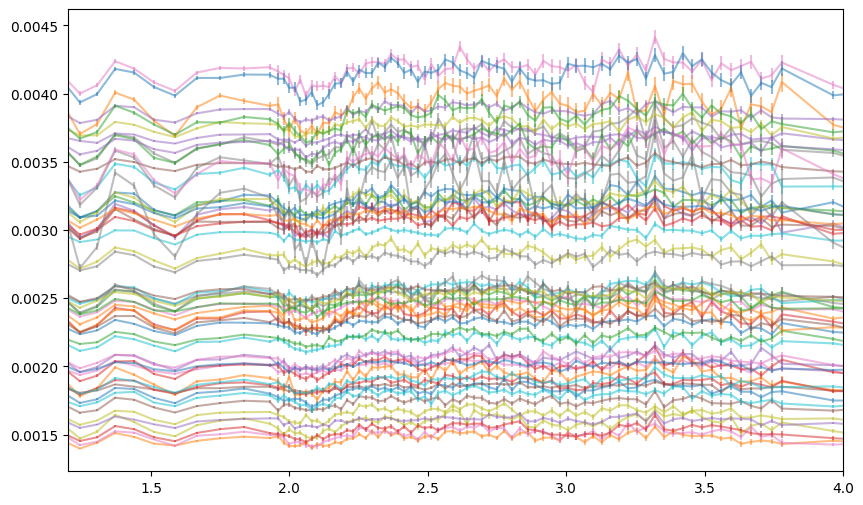

In [3]:
fig = plt.figure(figsize=(10, 6))
for file_ in subfolders:
    data = np.loadtxt('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.txt').T
    plt.errorbar(data[0], data[1], yerr=data[2], alpha=0.5, label=file_)

# plt.legend()
plt.xlim(1.2, 4)

In [4]:
import h5py

nobs = []
for file_ in subfolders:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        # print(f["ModelParameters/Chemistry"].keys())
        nobs.append(f["Output/Spectra/instrument_nobs"][()])

print(nobs)

[104.0, 17.0, 63.0, 57.0, 86.0, 427.0, 36.0, 155.0, 82.0, 31.0, 41.0, 100.0, 77.0, 91.0, 29.0, 134.0, 176.0, 53.0, 66.0, 115.0, 123.0, 65.0, 132.0, 81.0, 164.0, 60.0, 136.0, 19.0, 82.0, 81.0, 272.0, 170.0, 42.0, 133.0, 94.0, 140.0, 142.0, 40.0, 139.0, 167.0, 49.0, 57.0, 144.0, 48.0, 244.0, 166.0, 131.0, 68.0, 44.0, 138.0, 81.0, 92.0, 44.0, 142.0, 105.0, 98.0, 25.0, 10.0, 116.0, 135.0]


<KeysViewHDF5 ['Contributions', 'instrument_nobs', 'instrument_noise', 'instrument_original_spectrum', 'instrument_spectrum', 'instrument_wlgrid', 'instrument_wngrid', 'instrument_wnwidth', 'native_spectrum', 'native_tau', 'native_wlgrid', 'native_wngrid']>


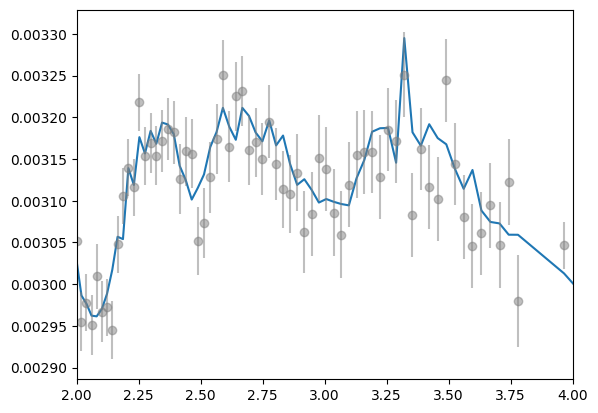

In [5]:
file_ = "Planet99542_Reduced"
file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
with h5py.File(file_name, 'r') as f:
    print(f["Output/Spectra"].keys())
    # nobs.append(f["Output/Spectra/instrument_nobs"][()])
    
    plt.plot(f["Output/Spectra/instrument_wlgrid"][()], f["Output/Spectra/instrument_original_spectrum"][()])
    plt.errorbar(f["Output/Spectra/instrument_wlgrid"][()], f["Output/Spectra/instrument_spectrum"][()], yerr=f["Output/Spectra/instrument_noise"][()], fmt="o", c="grey", alpha=0.5)
    
    plt.xlim(2,4)

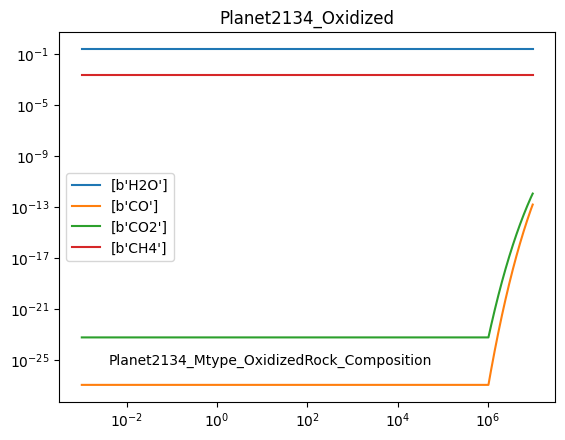

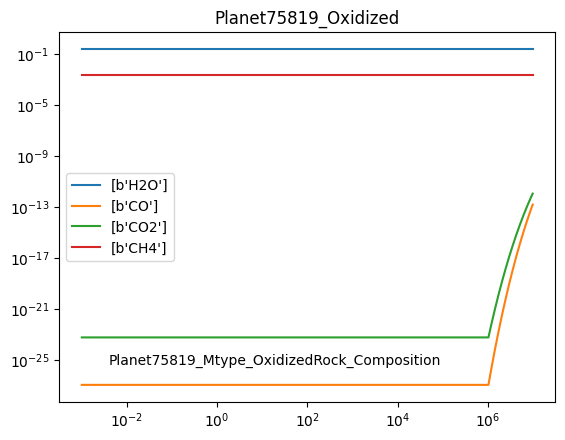

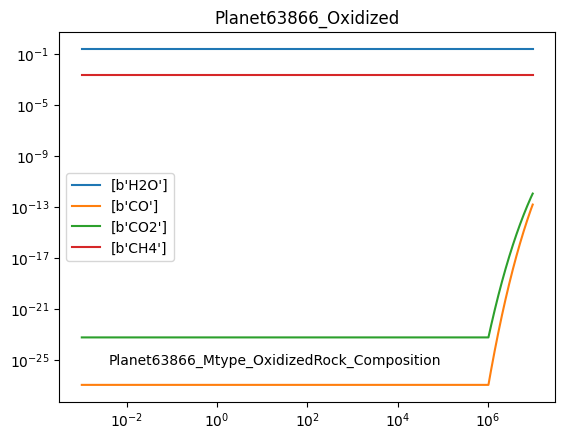

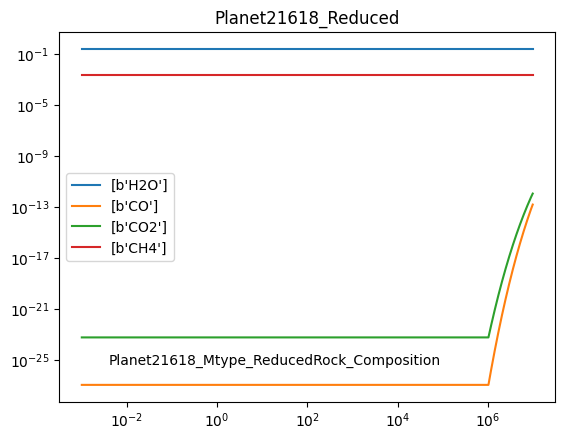

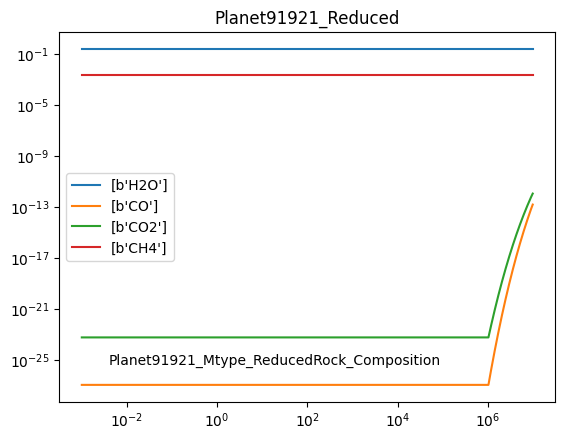

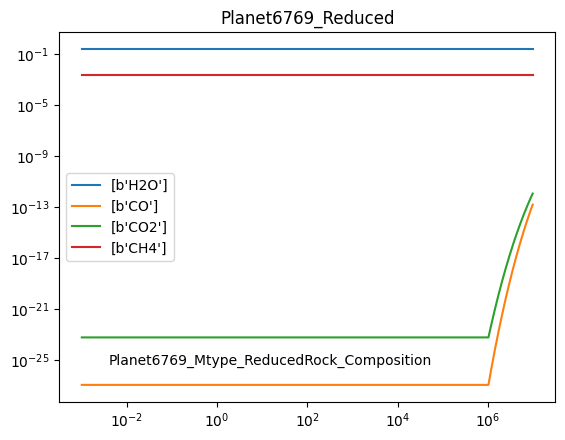

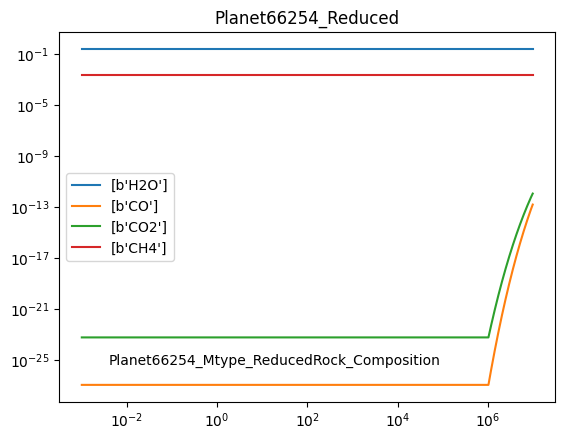

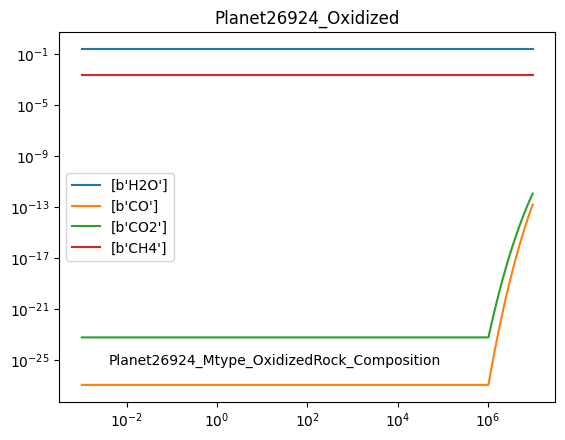

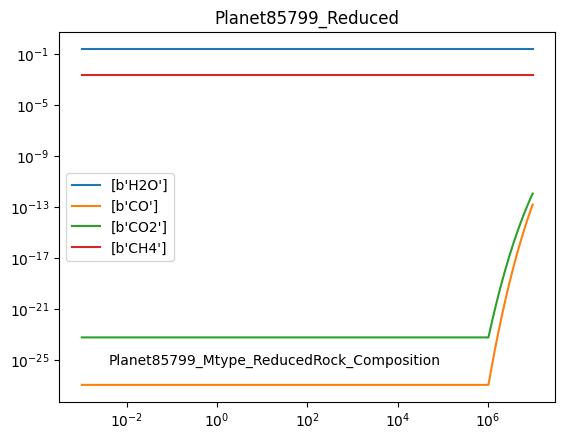

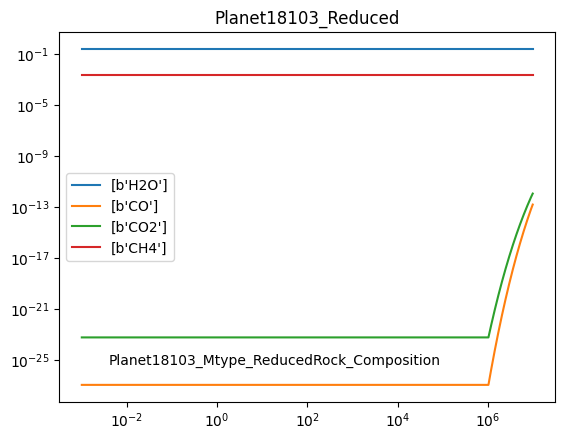

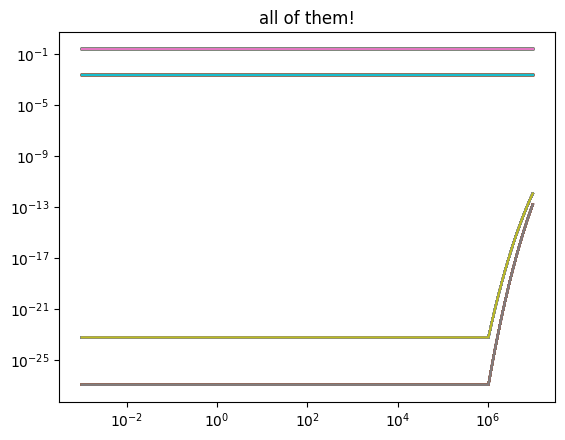

In [48]:
files = ["Planet99542_Reduced"]
files = subfolders

for file_ in files[:10]:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        fname = (f["ModelParameters/Chemistry/filename"][()])
        mols = f["ModelParameters/Chemistry/active_gases"][()]
        profile = f["Output/Profiles/active_mix_profile"][()] 
        
        fname = fname.decode("utf-8").split("/")[-1]
        plt.title(file_)
        for m,p in zip(mols, profile):
            plt.plot(f["Output/Profiles/pressure_profile"][()], p, label=m)
        plt.annotate(fname, (0.1, 0.1), xycoords="axes fraction")
        plt.xscale("log")
        plt.yscale("log")
        plt.legend()
        plt.show()
    # nobs.append(f["Output/Spectra/instrument_nobs"][()])
    
    
for file_ in files:
    file_name = ('forwards/ArielInstrumentTier2/'+file_+'/'+file_+'.hdf5')
    with h5py.File(file_name, 'r') as f:
        fname = (f["ModelParameters/Chemistry/filename"][()])
        mols = f["ModelParameters/Chemistry/active_gases"][()]
        profile = f["Output/Profiles/active_mix_profile"][()] 
        
        fname = fname.decode("utf-8").split("/")[-1]
        for m,p in zip(mols, profile):
            plt.plot(f["Output/Profiles/pressure_profile"][()], p, label=m)
        # plt.annotate(fname, (0.1, 0.1), xycoords="axes fraction")

    plt.title("all of them!")

    plt.xscale("log")
    plt.yscale("log")
        # plt.legend()
        # plt.show()

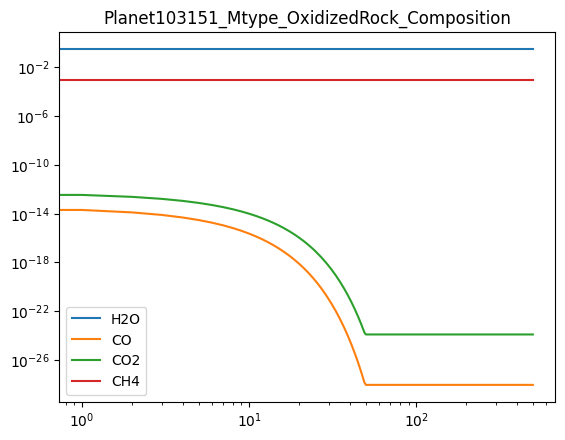

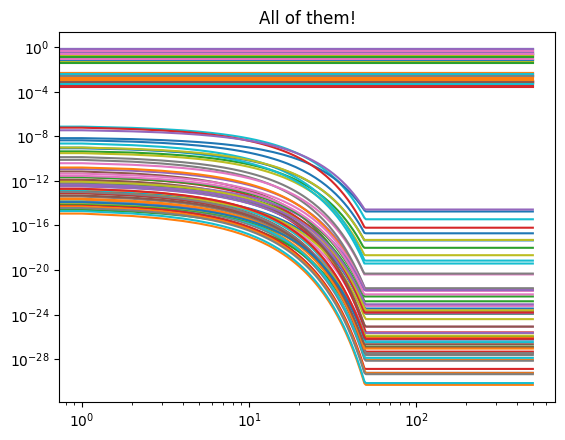

In [75]:
general_path = "/home/ariel/lorenzo.mugnai/USER_DATA/Alfnoor2/20250226 - NAOJ/first_week/M_type"
directory = os.path.join(general_path, "CompoProfile_Oxidized") 
files = [os.path.join(directory, name) for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name)) and "DS_Store" not in name]

mols = ["H2", "H2O", "CO", "CO2", "CH4", "He"]

for file_ in files[:1]:
    data = np.loadtxt(file_).T
    fname = file_.split("/")[-1]
    plt.title(fname)
    for m,p in zip(mols[1:-1], data[1:-1]):
        plt.plot(p, label=m)
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()
    
    
for file_ in files:
    data = np.loadtxt(file_).T
    plt.title("All of them!")
    for m,p in zip(mols[1:-1], data[1:-1]):
        plt.plot(p, label=m)
plt.xscale("log")
plt.yscale("log")

plt.show()